In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # for calculating the auc from fpr, tpr

plt.style.use("science.mplstyle")

In [6]:
base_dir = "/global/home/users/rrmastandrea/MJetCLR/"  # change this to your working directory

# TPR / FPR

Iterate through the random seeds and pick the one with the best auc

dim_8_seed_1
dim_8_seed_2
dim_8_seed_3
dim_8_seed_4
dim_8_seed_5
dim_16_seed_1
dim_16_seed_2
dim_16_seed_3
dim_16_seed_4
dim_16_seed_5
dim_32_seed_1
dim_32_seed_2
dim_32_seed_3
dim_32_seed_4
dim_32_seed_5
dim_64_seed_1
dim_64_seed_2
dim_64_seed_3
dim_64_seed_4
dim_64_seed_5
dim_128_seed_1
dim_128_seed_2
dim_128_seed_3
dim_128_seed_4
dim_128_seed_5
dim_256_seed_1
dim_256_seed_2
dim_256_seed_3
dim_256_seed_4
dim_256_seed_5
dim_512_seed_1
dim_512_seed_2
dim_512_seed_3
dim_512_seed_4
dim_512_seed_5


/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computin

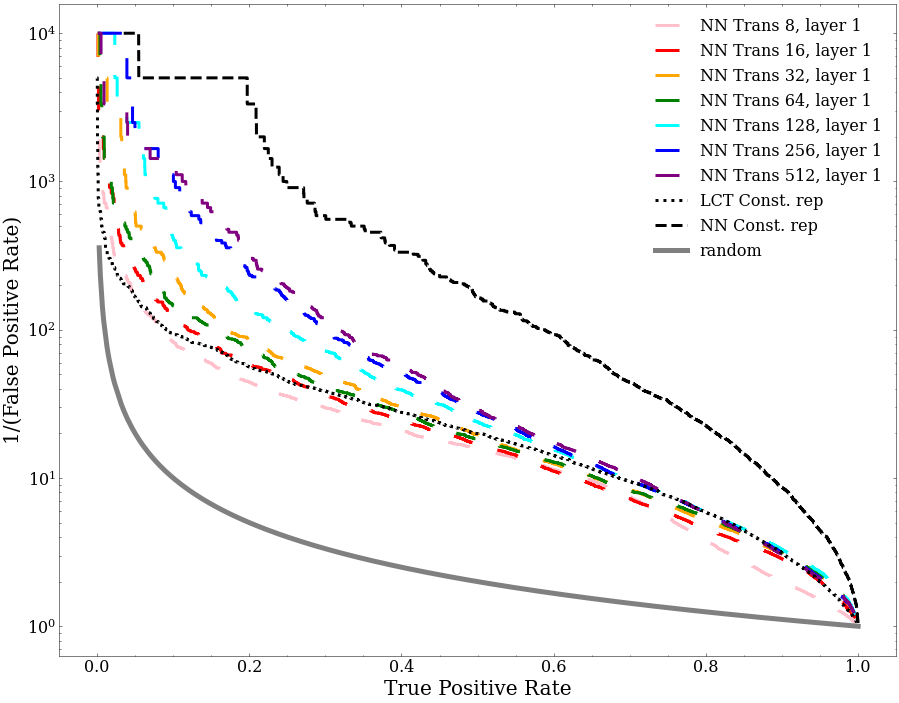

In [13]:
# Load in the data

dims_list = [8, 16, 32, 64, 128, 256, 512]
seeds_list = [1,2,3,4,5]


lct_const_rep_tpr_dict = {}
lct_const_rep_fpr_dict = {}
nn_const_rep_tpr_dict = {}
nn_const_rep_fpr_dict = {}
trans_BC_tpr_dict = {}
trans_BC_fpr_dict = {}
lct_tpr_dict = {0:{},1:{},2:{}}
lct_fpr_dict = {0:{},1:{},2:{}}
nn_tpr_dict = {0:{},1:{},2:{}}
nn_fpr_dict = {0:{},1:{},2:{}}

lct_best_auc_dict = {0:{x:0 for x in dims_list},1:{x:0 for x in dims_list},2:{x:0 for x in dims_list}}
nn_best_auc_dict = {0:{x:0 for x in dims_list},1:{x:0 for x in dims_list},2:{x:0 for x in dims_list}}
trans_BC_best_auc_dict = {x:0 for x in dims_list}
lct_const_rep_best_auc_dict = {x:0 for x in dims_list}
nn_const_rep_best_auc_dict = {x:0 for x in dims_list}

for dim in dims_list:
                    
    for seed in seeds_list:
        
        exp_id = "dim_"+str(dim)+"_seed_"+str(seed)
        
        print(exp_id)
    
    
        expt_dir = base_dir + "projects/rep_learning/experiments/dim_scan_100k/" + exp_id + "/"
        expt_dir_trans_BC =  base_dir + "projects/rep_learning/experiments/dim_scan_22_02_19/" + exp_id + "/"
        constit_num = 50

        # Constituent reps
        #"""
        expt_dir_CR =  base_dir + "projects/rep_learning/experiments/dim_scan_22_02_19/const_rep_seed_"+str(seed)+"/"
        
        local_tpr = np.load( expt_dir_CR+"const_rep_lct_tpr_"+str(2*constit_num)+".npy" )
        local_fpr = np.load( expt_dir_CR+"const_rep_lct_fpr_"+str(2*constit_num)+".npy" )
        local_auc = metrics.auc(local_fpr, local_tpr)

        if local_auc >= lct_const_rep_best_auc_dict[dim]:
            lct_const_rep_best_auc_dict[dim] = local_auc
            lct_const_rep_tpr_dict[dim] = local_tpr
            lct_const_rep_fpr_dict[dim] = local_fpr
            
        local_tpr = np.load( expt_dir_CR+"const_rep_nn_tpr_"+str(2*constit_num)+".npy" )
        local_fpr = np.load( expt_dir_CR+"const_rep_nn_fpr_"+str(2*constit_num)+".npy" )
        local_auc = metrics.auc(local_fpr, local_tpr)

        if local_auc >= nn_const_rep_best_auc_dict[dim]:
            nn_const_rep_best_auc_dict[dim] = local_auc
            nn_const_rep_tpr_dict[dim] = local_tpr
            nn_const_rep_fpr_dict[dim] = local_fpr
            
        #"""

        # Transformer BC 
        #"""
        
        

            
        local_tpr = np.load( expt_dir_trans_BC+"trans_BC_tpr_"+str(constit_num)+".npy" )
        local_fpr = np.load( expt_dir_trans_BC+"trans_BC_fpr_"+str(constit_num)+".npy" )
        local_auc = metrics.auc(local_fpr, local_tpr)

        if local_auc >= trans_BC_best_auc_dict[dim]:
            trans_BC_best_auc_dict[dim] = local_auc
            trans_BC_tpr_dict[dim] = local_tpr
            trans_BC_fpr_dict[dim] = local_fpr
        #"""

        # CLR trained LCT
        for i in range(3):
            local_tpr = np.load( expt_dir+"CLR_LCT"+str(i)+"_tpr_"+str(constit_num)+".npy" )
            local_fpr = np.load( expt_dir+"CLR_LCT"+str(i)+"_fpr_"+str(constit_num)+".npy" )
            local_auc = metrics.auc(local_fpr, local_tpr)
                    
            if local_auc >= lct_best_auc_dict[i][dim]:
                lct_best_auc_dict[i][dim] = local_auc
                lct_tpr_dict[i][dim] = local_tpr
                lct_fpr_dict[i][dim] = local_fpr
                

        # CLR trained NN
        for i in range(3):
            local_tpr = np.load( expt_dir+"CLR_NN"+str(i)+"_tpr_"+str(constit_num)+".npy" )
            local_fpr = np.load( expt_dir+"CLR_NN"+str(i)+"_fpr_"+str(constit_num)+".npy" )
            local_auc = metrics.auc(local_fpr, local_tpr)
                    
            if local_auc >= nn_best_auc_dict[i][dim]:
                nn_best_auc_dict[i][dim] = local_auc
                nn_tpr_dict[i][dim] = local_tpr
                nn_fpr_dict[i][dim] = local_fpr
                
   


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (15,12))

l = 3

layer = 1
dims_list = [64]
dims_list = [8, 16, 32, 64, 128, 256, 512]


#dims_list = [16]

for i, dim in enumerate(dims_list):
    

    # ALL DIMS
    #"""
    #plt.plot(lct_tpr_dict[layer][dim], 1.0/lct_fpr_dict[layer][dim], label = "LCT Trans "+str(dim)+", layer "+str(layer), color = colors[i], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[layer][dim], 1.0/nn_fpr_dict[layer][dim], label = "NN Trans "+str(dim)+", layer "+str(layer), color = colors[i], linestyle = (0,(8,10)),  linewidth = l)
    #plt.plot(trans_BC_tpr_dict[dim], 1.0/trans_BC_fpr_dict[dim], label = "Trans BC "+str(dim), color = colors[i], linestyle = "dashdot",  linewidth = l)
    #"""
    
   
 
plt.plot(lct_const_rep_tpr_dict[dim], 1.0/lct_const_rep_fpr_dict[dim], label = "LCT Const. rep", color = "black", linestyle = "dotted",  linewidth = l)
plt.plot(nn_const_rep_tpr_dict[dim], 1.0/nn_const_rep_fpr_dict[dim], label = "NN Const. rep", color = "black", linestyle = "dashed" , linewidth = l)
    
plt.plot(lct_tpr_dict[2][dim],1.0/lct_tpr_dict[2][dim], label = "random", color = "grey", linewidth = 5)
 
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()



img_name = "fpr.pdf"
pp = PdfPages(img_name)
pp.savefig(fig)
pp.close()



# Losses

In [ ]:
# load in data
losses_clr_train = {}
losses_clr_numer_train = {}
losses_clr_denom_train = {}
losses_clr_val = {}

losses_nn_latent_train = {0:{},1:{},2:{}}
losses_nn_latent_val = {0:{},1:{},2:{}}

lct_auc = {}
nn_auc = {}


grading = 50
start = grading
n_constits_max = grading


expt_dir = base_dir + "projects/rep_learning/experiments/dijet_dim_scan_21_07_12/0256dt1/"

for constit_num in range(start,n_constits_max+grading,grading):

    losses_clr_train[constit_num] = np.load( expt_dir+"clr_losses_train_"+str(constit_num)+".npy")
    losses_clr_numer_train[constit_num] = np.load( expt_dir+"clr_numer_loss_train_"+str(constit_num)+".npy")
    losses_clr_denom_train[constit_num] = np.load( expt_dir+"clr_denom_loss_train_"+str(constit_num)+".npy")
    losses_clr_val[constit_num] = np.load( expt_dir+"clr_losses_val_"+str(constit_num)+".npy")
    
    for trait in range(3):
        losses_nn_latent_train[trait][constit_num] = np.load( expt_dir+"NN"+str(trait)+"_latent_losses_train_"+str(constit_num)+".npy")
        losses_nn_latent_val[trait][constit_num] = np.load( expt_dir+"NN"+str(trait)+"_latent_losses_val_"+str(constit_num)+".npy")
    
    lct_auc[constit_num] = np.load( expt_dir+"lct_auc_"+str(constit_num)+".npy")
    nn_auc[constit_num] = np.load( expt_dir+"nn_auc_"+str(constit_num)+".npy")

    
def plot_losses(list_of_plots, title, ylog = False, ylim = ""):
    """
    list_of_plots = [(plot_x, plot_y, label)]
    """
    plt.figure()
    for to_plot in list_of_plots:
       
        plt.plot(to_plot[0], to_plot[1], label=to_plot[2])
    plt.legend()
    if ylog:
        plt.yscale("log")
    if ylim != "":
        plt.ylim(ylim[0],ylim[1])
    plt.xlabel("Epochs")
    plt.title(title)
    plt.show()
    
    
"""
Plot the training contrastive losses
"""
plot_clr_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_clr_losses.append((range(len(losses_clr_train[constit_num])),
                           losses_clr_train[constit_num], "CLR loss, "+str(constit_num) + " constits"))
    plot_clr_losses.append((losses_clr_val[constit_num][0],
                           losses_clr_val[constit_num][1],"Val loss, "+str(constit_num) + " constits"))
plot_losses(plot_clr_losses, "Contrastive losses, training", True)  
    

"""
Plot the LC + NN AUC
"""

plot_LCT_stats = []

for constit_num in range(start,n_constits_max+grading,grading):
    plot_LCT_stats.append((lct_auc[constit_num][0], lct_auc[constit_num][1],
                             "LC transformer, "+str(constit_num) + " constits"))
    plot_LCT_stats.append((lct_auc[constit_num][0], lct_auc[constit_num][2],
                            "LC hidden layer, "+str(constit_num) + " constits"))
    plot_LCT_stats.append((lct_auc[constit_num][0], lct_auc[constit_num][3],
                            "LC output layer, "+str(constit_num) + " constits"))

plot_losses(plot_LCT_stats, "ROC Area", False)  


plot_NN_stats = []

for constit_num in range(start,n_constits_max+grading,grading):
    plot_NN_stats.append((nn_auc[constit_num][0], nn_auc[constit_num][1],
                             "NN transformer, "+str(constit_num) + " constits"))
    plot_NN_stats.append((nn_auc[constit_num][0], nn_auc[constit_num][2],
                            "NN hidden layer, "+str(constit_num) + " constits"))
    plot_NN_stats.append((nn_auc[constit_num][0], nn_auc[constit_num][3],
                            "NN output layer, "+str(constit_num) + " constits"))

    
plot_losses(plot_NN_stats, "ROC Area", False)  



    
    
"""
Plot the training contrastive losses num + denom
"""
"""
plot_num_val_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_num_val_losses.append((range(len(losses_clr_numer_train[constit_num])),
                           -losses_clr_numer_train[constit_num], str(constit_num) + " constits"))
plot_losses(plot_num_val_losses, "-Alignment losses (should increase)", True)  

plot_den_val_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_den_val_losses.append((range(len(losses_clr_denom_train_num_jets[constit_num])),
                           losses_clr_denom_train[constit_num],  str(constit_num) + " constits"))
plot_losses(plot_den_val_losses, "Uniformity losses (should decrease)", True)  
"""

"""
Plot the NN latent space training losses
"""

for trait in range(3):
    
    plot_clr_losses = []
    for constit_num in range(start,n_constits_max+grading,grading):
        plot_clr_losses.append((range(len(losses_nn_latent_train[trait][constit_num])),
                               losses_nn_latent_train[trait][constit_num], "CLR loss, "+str(constit_num) + " constits"))
        plot_clr_losses.append((losses_nn_latent_val[trait][constit_num][0],
                               losses_nn_latent_val[trait][constit_num][1],"Val loss, "+str(constit_num) + " constits"))
    plot_losses(plot_clr_losses, "Contrastive losses, NN latent space "+str(trait), True)  


